In [40]:
from spinbox import *
from spinbox.extras import pmat
seeder = itertools.count(0,1)

[[0.31040711+0.25643577j]]
[[0.31040711+0.25643577j]]
Real part:
[1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0]
[nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, nan]
[nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, nan, nan]
[nan, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, nan, nan, nan]
[nan, nan, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, 1.0, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, 1.0, nan, nan, nan, nan, 1.0, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, 1.0, nan, nan, 1.0, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, 1.0, nan, nan, 1.0, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, 1.0, nan, nan, nan, nan, 1.0, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, 1.0, nan, nan, nan, nan

C:\Users\MainUser\AppData\Local\Temp\ipykernel_12040\2398621724.py:36: RuntimeWarning: invalid value encountered in divide
  pmat(prop_rbm.coefficients / prop_exact.coefficients, heatmap=True)


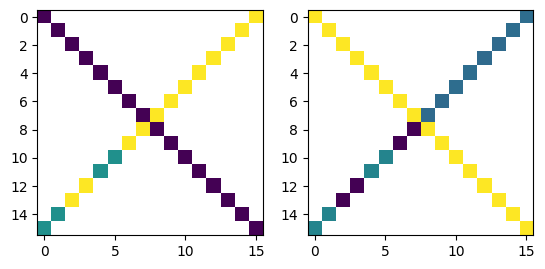

In [172]:
isospin = True
n_particles = 2

dt = 0.01
deltatau = dt*1j

coupling = -1

y = HilbertState(n_particles, isospin=isospin).randomize(seed=next(seeder))
yp = HilbertState(n_particles, isospin=isospin, ketwise=False).randomize(seed=next(seeder))

op_i = HilbertOperator(n_particles, isospin=isospin).apply_sigma(0,0).apply_tau(0,0)
op_j = HilbertOperator(n_particles, isospin=isospin).apply_sigma(1,1).apply_tau(1,1)
prop_exact = (op_i * op_j).scale(- deltatau * 0.5 * coupling).exp()

print(yp * prop_exact * y)

####

def a2b_factors(coupling:float) -> tuple:
    if not (np.real(coupling)==0. or np.imag(coupling)==0.):
        raise ValueError("coupling should be entirely real or imaginary")
    z = deltatau * 0.5 * coupling
    n = cexp(-cabs(z))
    w = carctanh(csqrt(ctanh(cabs(z))))
    s = z/cabs(z)
    return n, w, s

n,w,s = a2b_factors(coupling)

kernel = lambda h : (op_i-op_j.scale(s)).scale(w*(2*h-1)).exp()

prop_rbm = (kernel(0) + kernel(1)).scale(n/2)

print(yp * prop_rbm * y)
pmat(prop_rbm.coefficients / prop_exact.coefficients, heatmap=True)
